In [1]:
import pandas as pd

from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load your dataset
file_path = '/content/drive/MyDrive/telemetry_feature_engineered.csv'
df = pd.read_csv(file_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Step 2: Extract ZIP directly to DataFrames
import pandas as pd
import numpy as np
import zipfile
import io

# Path to your ZIP file on Drive
zip_path = '/content/drive/MyDrive/archive (26).zip'

# Extract each CSV directly to DataFrame
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # Get all file names in the zip
    file_list = zip_ref.namelist()
    print("Files in ZIP:", file_list)

    # Extract each CSV to DataFrame
    telemetry = pd.read_csv(zip_ref.open('PdM_telemetry.csv'))
    errors = pd.read_csv(zip_ref.open('PdM_errors.csv'))
    maint = pd.read_csv(zip_ref.open('PdM_maint.csv'))
    failures = pd.read_csv(zip_ref.open('PdM_failures.csv'))
    machines = pd.read_csv(zip_ref.open('PdM_machines.csv'))

print("✅ All files loaded directly to DataFrames!")
print(f"Telemetry: {telemetry.shape}")
print(f"Errors: {errors.shape}")
print(f"Maintenance: {maint.shape}")
print(f"Failures: {failures.shape}")
print(f"Machines: {machines.shape}")

Files in ZIP: ['PdM_errors.csv', 'PdM_failures.csv', 'PdM_machines.csv', 'PdM_maint.csv', 'PdM_telemetry.csv']
✅ All files loaded directly to DataFrames!
Telemetry: (876100, 6)
Errors: (3919, 3)
Maintenance: (3286, 3)
Failures: (761, 3)
Machines: (100, 3)


<div style="color:white;
           display:fill;
           border-radius:10px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:#32a6a8;
           color:Black;
           font-family:cursive;
            padding:5px 5px 5px 5px;
           ">
<h1 style="text-align:center;font-weight: bold;">Importing Libraries</h1>



</div>





In [3]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px

<div style="color:white;
           display:fill;
           border-radius:10px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:#32a6a8;
           color:Black;
           font-family:cursive;
            padding:5px 5px 5px 5px;
           ">
<h1 style="text-align:center;font-weight: bold;">Exploratory Data Analysis</h1>



</div>





In [4]:
telemetry.head()

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511


In [5]:
errors.head()

,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4


In [6]:
maint.head()

,datetime,machineID,comp
0,2014-06-01 06:00:00,1,comp2
1,2014-07-16 06:00:00,1,comp4
2,2014-07-31 06:00:00,1,comp3
3,2014-12-13 06:00:00,1,comp1
4,2015-01-05 06:00:00,1,comp4


In [7]:
failures.head()

,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4


In [8]:
machines.head()

,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2


<div style="color:white;
           display:fill;
           border-radius:10px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:#32a6a8;
           color:Black;
           font-family:cursive;
            padding:5px 5px 5px 5px;
           ">
<h2 style="text-align:center;font-weight: bold;">EDA on Telemetry Data</h2>



</div>





In [9]:
telemetry['temperature'] = telemetry['rotate']
telemetry = telemetry.drop(columns='rotate')

In [10]:
telemetry['datetime'] = pd.to_datetime(
    telemetry['datetime'], format="%Y-%m-%d %H:%M:%S")

print("Total number of telemetry records: %d" % len(telemetry.index))

telemetry.describe()


Total number of telemetry records: 876100


,datetime,machineID,volt,pressure,vibration,temperature
count,876100,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000
mean,2015-07-02 18:00:00,50.500000,170.777736,100.858668,40.385007,446.605119
min,2015-01-01 06:00:00,1.000000,97.333604,51.237106,14.877054,138.432075
25%,2015-04-02 12:00:00,25.750000,160.304927,93.498181,36.777299,412.305714
50%,2015-07-02 18:00:00,50.500000,170.607338,100.425559,40.237247,447.558150
75%,2015-10-02 00:00:00,75.250000,181.004493,107.555231,43.784938,482.176600
max,2016-01-01 06:00:00,100.000000,255.124717,185.951998,76.791072,695.020984
std,NaN,28.866087,15.509114,11.048679,5.370361,52.673886


In [11]:
plot_df = telemetry.loc[(telemetry['machineID'] == 1) &
                        (telemetry['datetime'] > pd.to_datetime('2015-01-01')) &
                        (telemetry['datetime'] < pd.to_datetime('2015-02-01')), ['datetime', 'volt']]

In [12]:
fig = px.line(x=plot_df['datetime'].values, y=plot_df['volt'].values, title='Voltage over time', template='plotly_dark')
fig.update_layout(xaxis_title='Time', yaxis_title='Voltage')
fig.show()

In [13]:
plot_df = telemetry.loc[(telemetry['machineID'] == 1) &
                        (telemetry['datetime'] > pd.to_datetime('2015-01-01')) &
                        (telemetry['datetime'] < pd.to_datetime('2015-02-01')), ['datetime', 'temperature']]

In [14]:
fig = px.line(x=plot_df['datetime'].values, y=plot_df['temperature'].values, title='Temperature over time', template='plotly_dark')
fig.update_layout(xaxis_title='Time', yaxis_title='Temperature')
fig.show()

In [15]:
telemetry['volt'].corr(telemetry['temperature'])

np.float64(-0.0015105847511460294)

<div style="color:white;
           display:fill;
           border-radius:10px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:#32a6a8;
           color:Black;
           font-family:cursive;
            padding:5px 5px 5px 5px;
           ">
<h2 style="text-align:center;font-weight: bold;">EDA on Errors Data</h2>



</div>





In [16]:
errors['datetime'] = pd.to_datetime(
    errors['datetime'], format="%Y-%m-%d %H:%M:%S")
errors['errorID'] = errors['errorID'].astype('object')

print("Total number of error records: %d" % len(errors.index))
errors.head()


Total number of error records: 3919


,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4


In [17]:

fig = px.bar(x=errors['errorID'].values,
             title='Count of Errors', template='plotly_dark', color=errors['errorID'].values)
fig.update_layout(xaxis_title='Error Type', yaxis_title='Count')
fig.show()


In [18]:
errors_grouped = errors.copy()
errors_grouped['year_month'] = errors_grouped['datetime'].dt.to_period('W')

errors_grouped = errors_grouped.join(pd.get_dummies(errors_grouped['errorID']))

errors_grouped = errors_grouped.groupby('year_month').agg({'errorID': 'count',
                                                   'error1': 'sum',
                                                   'error2': 'sum',
                                                   'error3': 'sum',
                                                   'error4': 'sum',
                                                   'error5': 'sum',
                                                  }).reset_index()

errors_grouped['year_month'] = errors_grouped['year_month'].astype(str)

In [19]:
fig = px.line(errors_grouped, x='year_month', y=['error1', 'error2', 'error3', 'error4', 'error5'],
              title='Count of errors over time', template='plotly_dark')
fig.update_layout(xaxis_title='Time', yaxis_title='Count')
fig.show()

<div style="color:white;
           display:fill;
           border-radius:10px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:#32a6a8;
           color:Black;
           font-family:cursive;
            padding:5px 5px 5px 5px;
           ">
<h2 style="text-align:center;font-weight: bold;">EDA on Maintainence Data</h2>



</div>





In [20]:
maint['datetime'] = pd.to_datetime(
    maint['datetime'], format="%Y-%m-%d %H:%M:%S")
maint['comp'] = maint['comp'].astype('object')

print("Total number of maintenance records: %d" % len(maint.index))
maint.head()


Total number of maintenance records: 3286


,datetime,machineID,comp
0,2014-06-01 06:00:00,1,comp2
1,2014-07-16 06:00:00,1,comp4
2,2014-07-31 06:00:00,1,comp3
3,2014-12-13 06:00:00,1,comp1
4,2015-01-05 06:00:00,1,comp4


In [21]:
fig = px.bar(x=maint['comp'].values,
             title='Count of Comp', template='plotly_dark', color=maint['comp'].values)
fig.update_layout(xaxis_title='Comp Type', yaxis_title='Count')
fig.show()


In [22]:
maint_grouped = maint.copy()
maint_grouped['year_month'] = maint_grouped['datetime'].dt.to_period('W')

maint_grouped = maint_grouped.join(pd.get_dummies(maint_grouped['comp']))

maint_grouped = maint_grouped.groupby('year_month').agg({'comp': 'count',
                                                 'comp1': 'sum',
                                                 'comp2': 'sum',
                                                 'comp3': 'sum',
                                                 'comp4': 'sum',
                                                }).reset_index()

maint_grouped['year_month'] = maint_grouped['year_month'].astype(str)

In [23]:
fig = px.line(maint_grouped, x='year_month', y=['comp1', 'comp2', 'comp3', 'comp4'],
              title='Count of mantainance over time', template='plotly_dark')
fig.update_layout(xaxis_title='Time', yaxis_title='Count')
fig.show()

<div style="color:white;
           display:fill;
           border-radius:10px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:#32a6a8;
           color:Black;
           font-family:cursive;
            padding:5px 5px 5px 5px;
           ">
<h2 style="text-align:center;font-weight: bold;">EDA on Machine Data</h2>



</div>





In [24]:
machines['model'] = machines['model'].astype('object')

print("Total number of machines: %d" % len(machines.index))
machines.head()


Total number of machines: 100


,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2


In [25]:


fig = go.Figure()
fig.add_trace(go.Histogram(
    x=machines.loc[machines['model'] == 'model1', 'age'], name='model1'))
fig.add_trace(go.Histogram(
    x=machines.loc[machines['model'] == 'model2', 'age'], name='model2'))
fig.add_trace(go.Histogram(
    x=machines.loc[machines['model'] == 'model3', 'age'], name='model3'))
fig.add_trace(go.Histogram(
    x=machines.loc[machines['model'] == 'model4', 'age'], name='model4',))
fig.update_layout(xaxis_title='Age', yaxis_title='Count', template='plotly_dark')
fig.update_layout(barmode='stack', title='Machine Age Distribution')
fig.show()


<div style="color:white;
           display:fill;
           border-radius:10px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:#32a6a8;
           color:Black;
           font-family:cursive;
            padding:5px 5px 5px 5px;
           ">
<h2 style="text-align:center;font-weight: bold;">EDA on Failure Data</h2>



</div>





In [26]:
failures['datetime'] = pd.to_datetime(
    failures['datetime'], format="%Y-%m-%d %H:%M:%S")
failures['failure'] = failures['failure'].astype('object')

print("Total number of failures: %d" % len(failures.index))
failures.head()


Total number of failures: 761


,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4


In [27]:
fig = px.bar(x=failures['failure'].values, title='Count of Failures', template='plotly_dark', color=failures['failure'].values)
fig.update_layout(xaxis_title='Failure Type', yaxis_title='Count')
fig.show()

In [28]:
failu_grouped = failures.copy()
failu_grouped['year_month'] = failu_grouped['datetime'].dt.to_period('W')

failu_grouped = failu_grouped.join(pd.get_dummies(failu_grouped['failure']))

failu_grouped = failu_grouped.groupby('year_month').agg({'failure': 'count',
                                                    'comp1': 'sum',
                                                    'comp2': 'sum',
                                                    'comp3': 'sum',
                                                    'comp4': 'sum',
                                                   }).reset_index()

failu_grouped['year_month'] = failu_grouped['year_month'].astype(str)

In [29]:
fig = px.line(failu_grouped, x='year_month', y=['comp1', 'comp2', 'comp3', 'comp4'],
              title='Count of failures over time', template='plotly_dark')
fig.update_layout(xaxis_title='Time', yaxis_title='Count')
fig.show()

<div style="color:white;
           display:fill;
           border-radius:10px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:#32a6a8;
           color:Black;
           font-family:cursive;
            padding:5px 5px 5px 5px;
           ">
<h1 style="text-align:center;font-weight: bold;">Failure vs Maintainence</h1>



</div>

In [30]:
maint_failu = pd.merge(maint_grouped, failu_grouped, on='year_month', how='outer')
maint_failu.columns = [col.replace('_x', '_maint') for col in maint_failu.columns]
maint_failu.columns = [col.replace('_y', '_fail') for col in maint_failu.columns]
maint_failu

,year_month,comp,comp1_maint,comp2_maint,comp3_maint,comp4_maint,failure,comp1_fail,comp2_fail,comp3_fail,comp4_fail
0,2014-05-26/2014-06-01,32,5,14,6,7,NaN,NaN,NaN,NaN,NaN
1,2014-06-16/2014-06-22,31,8,5,11,7,NaN,NaN,NaN,NaN,NaN
2,2014-06-30/2014-07-06,27,6,7,6,8,NaN,NaN,NaN,NaN,NaN
3,2014-07-14/2014-07-20,31,11,5,6,9,NaN,NaN,NaN,NaN,NaN
4,2014-07-28/2014-08-03,20,5,5,7,3,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
63,2015-11-30/2015-12-06,56,14,13,14,15,11.0,2.0,4.0,2.0,3.0
64,2015-12-07/2015-12-13,52,9,19,12,12,16.0,2.0,9.0,1.0,4.0
65,2015-12-14/2015-12-20,58,11,17,14,16,15.0,3.0,4.0,4.0,4.0
66,2015-12-21/2015-12-27,42,14,11,7,10,13.0,5.0,5.0,1.0,2.0


In [31]:
fig = px.line(maint_failu, x='year_month', y=['comp1_maint', 'comp2_maint', 'comp3_maint', 'comp4_maint',
                                              'comp1_fail', 'comp2_fail', 'comp3_fail', 'comp4_fail'],
              title='Count of failures vs maintainence over time', template='plotly_dark')
fig.update_layout(xaxis_title='Time', yaxis_title='Count')
fig.show()

<div style="color:white;
           display:fill;
           border-radius:10px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:#32a6a8;
           color:Black;
           font-family:cursive;
            padding:5px 5px 5px 5px;
           ">
<h1 style="text-align:center;font-weight: bold;">Feature Engineering</h1>



</div>

<div style="color:white;
           display:fill;
           border-radius:10px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:#32a6a8;
           color:Black;
           font-family:cursive;
            padding:5px 5px 5px 5px;
           ">
<h2 style="text-align:center;font-weight: bold;">Identifying Lag Features from Telemetry Data on a window of 24 hours</h2>



</div>





In [32]:
temp = []
fields = ['volt', 'temperature', 'pressure', 'vibration']
for col in fields:
    temp.append(pd.pivot_table(telemetry,
                               index='datetime',
                               columns='machineID',
                               values=col).resample('3H', closed='left', label='right').mean().unstack())
telemetry_mean_3h = pd.concat(temp, axis=1)
telemetry_mean_3h.columns = [i + 'mean_3h' for i in fields]
telemetry_mean_3h.reset_index(inplace=True)


temp = []

for col in fields:
    temp.append(pd.pivot_table(telemetry,
                               index='datetime',
                               columns='machineID',
                               values=col).resample('3H', closed='left', label='right').std().unstack())
telemetry_sd_3h = pd.concat(temp, axis=1)
telemetry_sd_3h.columns = [i + 'sd_3h' for i in fields]
telemetry_sd_3h.reset_index(inplace=True)

telemetry_mean_3h.head()

/tmp/ipython-input-67457374.py:7: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

/tmp/ipython-input-67457374.py:7: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

/tmp/ipython-input-67457374.py:7: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

/tmp/ipython-input-67457374.py:7: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

/tmp/ipython-input-67457374.py:19: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

/tmp/ipython-input-67457374.py:19: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

/tmp/ipython-input-67457374.py:19: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

/tmp/ipython-input-67457374.py:19: FutureWarning:

'H' is d

,machineID,datetime,voltmean_3h,temperaturemean_3h,pressuremean_3h,vibrationmean_3h
0,1,2015-01-01 09:00:00,170.028993,449.533798,94.592122,40.893502
1,1,2015-01-01 12:00:00,164.192565,403.949857,105.687417,34.255891
2,1,2015-01-01 15:00:00,168.134445,435.781707,107.793709,41.239405
3,1,2015-01-01 18:00:00,165.514453,430.472823,101.703289,40.373739
4,1,2015-01-01 21:00:00,168.809347,437.111120,90.911060,41.738542


In [33]:
temp = []
fields = ['volt', 'temperature', 'pressure', 'vibration']
for col in fields:
    temp.append(pd.pivot_table(telemetry,
                                               index='datetime',
                                               columns='machineID',
                                               values=col).resample('3H',closed='left',
                                                                                label='right',
                                                                                ).first().unstack().rolling(window=24, center=False).mean())
telemetry_mean_24h = pd.concat(temp, axis=1)
telemetry_mean_24h.columns = [i + 'mean_24h' for i in fields]
telemetry_mean_24h.reset_index(inplace=True)
telemetry_mean_24h = telemetry_mean_24h.loc[-telemetry_mean_24h['voltmean_24h'].isnull()]

temp = []
for col in fields:
    temp.append(pd.pivot_table(telemetry,
                                              index='datetime',
                                              columns='machineID',
                                              values=col).resample('3H',
                                                                               closed='left',
                                                                               label='right',
                                                                               ).first().unstack().rolling(window=24, center=False).std())
telemetry_sd_24h = pd.concat(temp, axis=1)
telemetry_sd_24h.columns = [i + 'sd_24h' for i in fields]
telemetry_sd_24h.reset_index(inplace=True)
telemetry_sd_24h = telemetry_sd_24h.loc[-telemetry_sd_24h['voltsd_24h'].isnull()]

telemetry_mean_24h.head(10)

/tmp/ipython-input-633715013.py:7: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

/tmp/ipython-input-633715013.py:7: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

/tmp/ipython-input-633715013.py:7: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

/tmp/ipython-input-633715013.py:7: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

/tmp/ipython-input-633715013.py:20: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

/tmp/ipython-input-633715013.py:20: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

/tmp/ipython-input-633715013.py:20: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

/tmp/ipython-input-633715013.py:20: FutureWarning:



,machineID,datetime,voltmean_24h,temperaturemean_24h,pressuremean_24h,vibrationmean_24h
23,1,2015-01-04 06:00:00,171.536044,456.036706,101.652072,44.017022
24,1,2015-01-04 09:00:00,171.069056,457.285237,101.011726,44.148324
25,1,2015-01-04 12:00:00,170.859615,461.116153,101.172241,44.672216
26,1,2015-01-04 15:00:00,171.566669,457.893518,100.708151,44.993232
27,1,2015-01-04 18:00:00,171.536866,457.672110,99.826551,45.160570
28,1,2015-01-04 21:00:00,172.800672,454.497453,100.896227,45.690929
29,1,2015-01-05 00:00:00,171.963248,452.687991,101.312313,45.658369
30,1,2015-01-05 03:00:00,171.206225,448.104961,101.030466,46.457982
31,1,2015-01-05 06:00:00,171.999801,449.729553,101.472850,46.879346
32,1,2015-01-05 09:00:00,171.247302,451.930970,101.368307,47.831655


In [34]:
telemetry_feat = pd.concat([telemetry_mean_3h,
                            telemetry_sd_3h.iloc[:, 2:6],
                            telemetry_mean_24h.iloc[:, 2:6],
                            telemetry_sd_24h.iloc[:, 2:6]], axis=1).dropna()
telemetry_feat.describe()

,machineID,datetime,voltmean_3h,temperaturemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,temperaturesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,temperaturemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,temperaturesd_24h,pressuresd_24h,vibrationsd_24h
count,291977.000000,291977,291977.000000,291977.000000,291977.000000,291977.000000,291977.000000,291977.000000,291977.000000,291977.000000,291977.000000,291977.000000,291977.000000,291977.000000,291977.000000,291977.000000,291977.000000,291977.000000
mean,50.503899,2015-07-02 19:50:32.314188800,170.777344,446.605536,100.858665,40.384696,13.299177,44.456698,8.885976,4.441105,170.738342,446.622451,100.871860,40.382356,15.055923,50.680485,10.330242,5.103534
min,1.000000,2015-01-01 09:00:00,125.532506,211.811184,72.118639,26.569635,0.025509,0.078991,0.027417,0.015278,156.713608,310.118604,91.162625,35.800869,6.178154,18.363177,4.275651,2.108104
25%,26.000000,2015-04-02 15:00:00,164.449518,427.559989,96.238713,38.147732,8.027807,26.903727,5.370694,2.684653,168.100594,440.859663,98.730139,39.379127,13.409911,44.992826,8.984156,4.488631
50%,51.000000,2015-07-02 21:00:00,170.434250,448.382424,100.234309,40.145805,12.495649,41.794255,8.346061,4.173937,170.285725,448.772454,100.195972,40.107229,14.942428,50.156537,10.009680,5.008386
75%,76.000000,2015-10-02 03:00:00,176.612207,468.448273,104.406729,42.227512,17.688547,59.105539,11.790367,5.899868,172.609273,456.129192,101.780484,40.908734,16.556760,55.657662,11.199380,5.589524
max,100.000000,2016-01-01 06:00:00,241.420717,586.682904,162.309656,69.311324,58.444332,179.903039,35.659369,18.305595,206.333895,491.081522,138.291979,55.266429,30.806053,117.198342,30.665847,12.757609
std,28.863913,NaN,9.501061,33.130486,7.414592,3.478391,6.966005,23.217195,4.656154,2.320281,4.178951,15.686284,3.983127,1.764322,2.383652,8.368899,2.129642,0.921640


In [35]:
telemetry_feat.head()

,machineID,datetime,voltmean_3h,temperaturemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,temperaturesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,temperaturemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,temperaturesd_24h,pressuresd_24h,vibrationsd_24h
23,1,2015-01-04 06:00:00,186.092896,451.641253,107.989359,55.308074,13.489090,62.185045,5.118176,4.904365,171.536044,456.036706,101.652072,44.017022,13.716658,41.767447,11.754808,6.878286
24,1,2015-01-04 09:00:00,166.281848,453.787824,106.187582,51.990080,24.276228,23.621315,11.176731,3.394073,171.069056,457.285237,101.011726,44.148324,13.741098,41.038218,11.521602,6.929500
25,1,2015-01-04 12:00:00,175.412103,445.450581,100.887363,54.251534,34.918687,11.001625,10.580336,2.921501,170.859615,461.116153,101.172241,44.672216,13.915181,33.879652,11.667258,7.162152
26,1,2015-01-04 15:00:00,157.347716,451.882075,101.289380,48.602686,24.617739,28.950883,9.966729,2.356486,171.566669,457.893518,100.708151,44.993232,13.583969,33.790685,11.447426,7.244618
27,1,2015-01-04 18:00:00,176.450550,446.033068,84.521555,47.638836,8.071400,76.511343,2.636879,4.108621,171.536866,457.672110,99.826551,45.160570,13.590129,33.787875,11.919716,7.167877


<div style="color:white;
           display:fill;
           border-radius:10px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:#32a6a8;
           color:Black;
           font-family:cursive;
            padding:5px 5px 5px 5px;
           ">
<h2 style="text-align:center;font-weight: bold;">Identifying Lag Features from Error Data on a window of 24 hours</h2>



</div>

In [36]:
error_count = pd.get_dummies(errors.set_index('datetime')).reset_index()

In [37]:
error_count.columns = ['datetime', 'machineID',
                       'error1', 'error2', 'error3', 'error4', 'error5']

In [38]:
error_count.head(10)

,datetime,machineID,error1,error2,error3,error4,error5
0,2015-01-03 07:00:00,1,True,False,False,False,False
1,2015-01-03 20:00:00,1,False,False,True,False,False
2,2015-01-04 06:00:00,1,False,False,False,False,True
3,2015-01-10 15:00:00,1,False,False,False,True,False
4,2015-01-22 10:00:00,1,False,False,False,True,False
5,2015-01-25 15:00:00,1,False,False,False,True,False
6,2015-01-27 04:00:00,1,True,False,False,False,False
7,2015-03-03 22:00:00,1,False,True,False,False,False
8,2015-03-05 06:00:00,1,True,False,False,False,False
9,2015-03-20 18:00:00,1,True,False,False,False,False


In [39]:
error_count = telemetry[['datetime', 'machineID']].merge(
    error_count, on=['machineID', 'datetime'], how='left').fillna(0.0)
error_count.describe()

,datetime,machineID
count,876403,876403.000000
mean,2015-07-02 18:00:05.931517952,50.499881
min,2015-01-01 06:00:00,1.000000
25%,2015-04-02 12:00:00,25.000000
50%,2015-07-02 18:00:00,50.000000
75%,2015-10-02 00:00:00,76.000000
max,2016-01-01 06:00:00,100.000000
std,NaN,28.866464


In [40]:
temp = []
fields = ['error%d' % i for i in range(1, 6)]
for col in fields:
    temp.append(pd.pivot_table(error_count,
                                              index='datetime',
                                              columns='machineID',
                                              values=col).resample('3H',
                                                                               closed='left',
                                                                               label='right',
                                                                               ).first().unstack().rolling(window=24, center=False).sum())
error_count = pd.concat(temp, axis=1)
error_count.columns = [i + 'count' for i in fields]
error_count.reset_index(inplace=True)
error_count = error_count.dropna()
error_count.describe()

/tmp/ipython-input-2042243934.py:7: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

/tmp/ipython-input-2042243934.py:7: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

/tmp/ipython-input-2042243934.py:7: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

/tmp/ipython-input-2042243934.py:7: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

/tmp/ipython-input-2042243934.py:7: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



,machineID,datetime,error1count,error2count,error3count,error4count,error5count
count,292077.000000,292077,292077.000000,292077.000000,292077.000000,292077.000000,292077.000000
mean,50.503898,2015-07-02 21:20:32.317505280,0.037483,0.029266,0.025117,0.025541,0.018666
min,1.000000,2015-01-01 09:00:00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,2015-04-02 15:00:00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,51.000000,2015-07-02 21:00:00,0.000000,0.000000,0.000000,0.000000,0.000000
75%,76.000000,2015-10-02 03:00:00,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.000000,2016-01-01 09:00:00,2.000000,2.000000,1.500000,3.000000,2.000000
std,28.863914,NaN,0.192195,0.154875,0.140627,0.158549,0.134294


In [41]:
error_count.head()

,machineID,datetime,error1count,error2count,error3count,error4count,error5count
23,1,2015-01-04 06:00:00,0.0,0.0,0.0,0.0,0.0
24,1,2015-01-04 09:00:00,0.0,0.0,0.0,0.0,1.0
25,1,2015-01-04 12:00:00,0.0,0.0,0.0,0.0,1.0
26,1,2015-01-04 15:00:00,0.0,0.0,0.0,0.0,1.0
27,1,2015-01-04 18:00:00,0.0,0.0,0.0,0.0,1.0


<div style="color:white;
           display:fill;
           border-radius:10px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:#32a6a8;
           color:Black;
           font-family:cursive;
            padding:5px 5px 5px 5px;
           ">
<h2 style="text-align:center;font-weight: bold;">Identifying Days Since Last Replacement using Maintainence on a window of 24 hours</h2>



</div>

In [42]:
import numpy as np

comp_rep = pd.get_dummies(maint.set_index('datetime')).reset_index()
comp_rep.columns = ['datetime', 'machineID',
                    'comp1', 'comp2', 'comp3', 'comp4']

comp_rep = telemetry[['datetime', 'machineID']].merge(comp_rep,
                                                      on=['datetime',
                                                          'machineID'],
                                                      how='outer').fillna(0).sort_values(by=['machineID', 'datetime'])


In [43]:
comp_rep

,datetime,machineID,comp1,comp2,comp3,comp4
0,2014-06-01 06:00:00,1,False,True,False,False
90,2014-07-16 06:00:00,1,False,False,False,True
121,2014-07-31 06:00:00,1,False,False,True,False
359,2014-12-13 06:00:00,1,True,False,False,False
400,2015-01-01 06:00:00,1,0,0,0,0
...,...,...,...,...,...,...
876822,2016-01-01 02:00:00,100,0,0,0,0
876922,2016-01-01 03:00:00,100,0,0,0,0
877022,2016-01-01 04:00:00,100,0,0,0,0
877122,2016-01-01 05:00:00,100,0,0,0,0


In [44]:
components = ['comp1', 'comp2', 'comp3', 'comp4']
for comp in components:
    comp_rep.loc[comp_rep[comp] < 1, comp] = None
    comp_rep.loc[-comp_rep[comp].isnull(),
                 comp] = comp_rep.loc[-comp_rep[comp].isnull(), 'datetime']
    comp_rep[comp] = comp_rep[comp].fillna(method='ffill')

comp_rep = comp_rep.loc[comp_rep['datetime'] > pd.to_datetime('2015-01-01')]

/tmp/ipython-input-3534899786.py:6: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/tmp/ipython-input-3534899786.py:6: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/tmp/ipython-input-3534899786.py:6: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/tmp/ipython-input-3534899786.py:6: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/tmp/ipython-input-3534899786.py:6: FutureWarning:

Se

In [45]:
comp_rep

,datetime,machineID,comp1,comp2,comp3,comp4
400,2015-01-01 06:00:00,1,2014-12-13 06:00:00,2014-06-01 06:00:00,2014-07-31 06:00:00,2014-07-16 06:00:00
502,2015-01-01 07:00:00,1,2014-12-13 06:00:00,2014-06-01 06:00:00,2014-07-31 06:00:00,2014-07-16 06:00:00
602,2015-01-01 08:00:00,1,2014-12-13 06:00:00,2014-06-01 06:00:00,2014-07-31 06:00:00,2014-07-16 06:00:00
702,2015-01-01 09:00:00,1,2014-12-13 06:00:00,2014-06-01 06:00:00,2014-07-31 06:00:00,2014-07-16 06:00:00
802,2015-01-01 10:00:00,1,2014-12-13 06:00:00,2014-06-01 06:00:00,2014-07-31 06:00:00,2014-07-16 06:00:00
...,...,...,...,...,...,...
876822,2016-01-01 02:00:00,100,2015-10-10 06:00:00,2015-12-24 06:00:00,2015-10-10 06:00:00,2015-11-09 06:00:00
876922,2016-01-01 03:00:00,100,2015-10-10 06:00:00,2015-12-24 06:00:00,2015-10-10 06:00:00,2015-11-09 06:00:00
877022,2016-01-01 04:00:00,100,2015-10-10 06:00:00,2015-12-24 06:00:00,2015-10-10 06:00:00,2015-11-09 06:00:00
877122,2016-01-01 05:00:00,100,2015-10-10 06:00:00,2015-12-24 06:00:00,2015-10-10 06:00:00,2015-11-09 06:00:00


In [46]:
for comp in components:
    comp_rep[comp] = (comp_rep["datetime"] - pd.to_datetime(comp_rep[comp])) / np.timedelta64(1, "D")

comp_rep.describe()

/tmp/ipython-input-1210611707.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-1210611707.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-1210611707.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-121

,datetime,machineID,comp1,comp2,comp3,comp4
count,876823,876823.000000,876823.000000,876823.000000,876823.000000,876823.000000
mean,2015-07-02 18:04:36.939815424,50.499106,53.517611,51.537350,52.722043,53.826833
min,2015-01-01 06:00:00,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2015-04-02 12:00:00,25.000000,13.291667,12.125000,13.125000,13.000000
50%,2015-07-02 18:00:00,50.000000,32.791667,29.666667,32.250000,32.500000
75%,2015-10-02 00:00:00,75.000000,68.708333,66.541667,67.333333,70.458333
max,2016-01-01 06:00:00,100.000000,491.958333,348.958333,370.958333,394.958333
std,NaN,28.866046,62.490219,59.271457,58.875826,59.704062


In [47]:
comp_rep.head()

,datetime,machineID,comp1,comp2,comp3,comp4
400,2015-01-01 06:00:00,1,19.000000,214.000000,154.000000,169.000000
502,2015-01-01 07:00:00,1,19.041667,214.041667,154.041667,169.041667
602,2015-01-01 08:00:00,1,19.083333,214.083333,154.083333,169.083333
702,2015-01-01 09:00:00,1,19.125000,214.125000,154.125000,169.125000
802,2015-01-01 10:00:00,1,19.166667,214.166667,154.166667,169.166667


<div style="color:white;
           display:fill;
           border-radius:10px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:#32a6a8;
           color:Black;
           font-family:cursive;
            padding:5px 5px 5px 5px;
           ">
<h2 style="text-align:center;font-weight: bold;">Machine Features: Descriptive Statistics about the Machine</h2>



</div>

In [48]:
final_feat = telemetry_feat.merge(
    error_count, on=['datetime', 'machineID'], how='left')
final_feat = final_feat.merge(
    comp_rep, on=['datetime', 'machineID'], how='left')
final_feat = final_feat.merge(machines, on=['machineID'], how='left')

final_feat.head()

,machineID,datetime,voltmean_3h,temperaturemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,temperaturesd_3h,pressuresd_3h,vibrationsd_3h,...,error2count,error3count,error4count,error5count,comp1,comp2,comp3,comp4,model,age
0,1,2015-01-04 06:00:00,186.092896,451.641253,107.989359,55.308074,13.489090,62.185045,5.118176,4.904365,...,0.0,0.0,0.0,0.0,22.000,217.000,157.000,172.000,model3,18
1,1,2015-01-04 09:00:00,166.281848,453.787824,106.187582,51.990080,24.276228,23.621315,11.176731,3.394073,...,0.0,0.0,0.0,1.0,22.125,217.125,157.125,172.125,model3,18
2,1,2015-01-04 12:00:00,175.412103,445.450581,100.887363,54.251534,34.918687,11.001625,10.580336,2.921501,...,0.0,0.0,0.0,1.0,22.250,217.250,157.250,172.250,model3,18
3,1,2015-01-04 15:00:00,157.347716,451.882075,101.289380,48.602686,24.617739,28.950883,9.966729,2.356486,...,0.0,0.0,0.0,1.0,22.375,217.375,157.375,172.375,model3,18
4,1,2015-01-04 18:00:00,176.450550,446.033068,84.521555,47.638836,8.071400,76.511343,2.636879,4.108621,...,0.0,0.0,0.0,1.0,22.500,217.500,157.500,172.500,model3,18


In [49]:
final_feat.describe()

,machineID,datetime,voltmean_3h,temperaturemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,temperaturesd_3h,pressuresd_3h,vibrationsd_3h,...,error1count,error2count,error3count,error4count,error5count,comp1,comp2,comp3,comp4,age
count,292698.000000,292698,292698.000000,292698.000000,292698.000000,292698.000000,292698.000000,292698.000000,292698.000000,292698.000000,...,292698.000000,292698.000000,292698.000000,292698.000000,292698.000000,292698.000000,292698.000000,292698.000000,292698.000000,292698.000000
mean,50.501268,2015-07-02 20:05:53.336203520,170.784219,446.575340,100.864117,40.386506,13.300159,44.453806,8.886790,4.441220,...,0.037758,0.029442,0.025289,0.025712,0.018841,53.444887,51.452085,52.640758,53.737431,11.329497
min,1.000000,2015-01-01 09:00:00,125.532506,211.811184,72.118639,26.569635,0.025509,0.078991,0.027417,0.015278,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,2015-04-02 15:00:00,164.452628,427.534759,96.239740,38.147926,8.027559,26.903316,5.370347,2.684286,...,0.000000,0.000000,0.000000,0.000000,0.000000,13.250000,12.125000,13.125000,13.000000,7.000000
50%,50.000000,2015-07-02 21:00:00,170.436600,448.367055,100.236344,40.146085,12.496284,41.792210,8.347255,4.173691,...,0.000000,0.000000,0.000000,0.000000,0.000000,32.750000,29.625000,32.125000,32.375000,12.000000
75%,75.000000,2015-10-02 03:00:00,176.619220,468.434339,104.409335,42.228807,17.690501,59.099500,11.791536,5.900380,...,0.000000,0.000000,0.000000,0.000000,0.000000,68.625000,66.375000,67.250000,70.375000,16.000000
max,100.000000,2016-01-01 06:00:00,241.420717,586.682904,162.309656,69.311324,58.444332,179.903039,35.659369,18.305595,...,2.000000,2.000000,1.500000,3.000000,2.000000,491.875000,348.875000,370.875000,394.875000,20.000000
std,28.863879,NaN,9.509413,33.161392,7.423015,3.481097,6.967073,23.216722,4.656677,2.320464,...,0.192877,0.155121,0.140891,0.159066,0.134849,62.477055,59.241774,58.860338,59.673951,5.827516


<div style="color:white;
           display:fill;
           border-radius:10px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:#32a6a8;
           color:Black;
           font-family:cursive;
            padding:5px 5px 5px 5px;
           ">
<h2 style="text-align:center;font-weight: bold;">Constructing Labels</h2>



</div>

In [50]:
labeled_features = final_feat.merge(
    failures, on=['datetime', 'machineID'], how='left')
labeled_features = labeled_features.fillna(
    method='bfill', limit=7)
labeled_features = labeled_features.fillna('none')
labeled_features.head()

/tmp/ipython-input-662949352.py:3: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



,machineID,datetime,voltmean_3h,temperaturemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,temperaturesd_3h,pressuresd_3h,vibrationsd_3h,...,error3count,error4count,error5count,comp1,comp2,comp3,comp4,model,age,failure
0,1,2015-01-04 06:00:00,186.092896,451.641253,107.989359,55.308074,13.489090,62.185045,5.118176,4.904365,...,0.0,0.0,0.0,22.000,217.000,157.000,172.000,model3,18,none
1,1,2015-01-04 09:00:00,166.281848,453.787824,106.187582,51.990080,24.276228,23.621315,11.176731,3.394073,...,0.0,0.0,1.0,22.125,217.125,157.125,172.125,model3,18,comp4
2,1,2015-01-04 12:00:00,175.412103,445.450581,100.887363,54.251534,34.918687,11.001625,10.580336,2.921501,...,0.0,0.0,1.0,22.250,217.250,157.250,172.250,model3,18,comp4
3,1,2015-01-04 15:00:00,157.347716,451.882075,101.289380,48.602686,24.617739,28.950883,9.966729,2.356486,...,0.0,0.0,1.0,22.375,217.375,157.375,172.375,model3,18,comp4
4,1,2015-01-04 18:00:00,176.450550,446.033068,84.521555,47.638836,8.071400,76.511343,2.636879,4.108621,...,0.0,0.0,1.0,22.500,217.500,157.500,172.500,model3,18,comp4


In [51]:
labeled_features.loc[labeled_features['failure'] == 'comp4'][:16]


,machineID,datetime,voltmean_3h,temperaturemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,temperaturesd_3h,pressuresd_3h,vibrationsd_3h,...,error3count,error4count,error5count,comp1,comp2,comp3,comp4,model,age,failure
1,1,2015-01-04 09:00:00,166.281848,453.787824,106.187582,51.990080,24.276228,23.621315,11.176731,3.394073,...,0.0,0.0,1.0,22.125,217.125,157.125,172.125,model3,18,comp4
2,1,2015-01-04 12:00:00,175.412103,445.450581,100.887363,54.251534,34.918687,11.001625,10.580336,2.921501,...,0.0,0.0,1.0,22.250,217.250,157.250,172.250,model3,18,comp4
3,1,2015-01-04 15:00:00,157.347716,451.882075,101.289380,48.602686,24.617739,28.950883,9.966729,2.356486,...,0.0,0.0,1.0,22.375,217.375,157.375,172.375,model3,18,comp4
4,1,2015-01-04 18:00:00,176.450550,446.033068,84.521555,47.638836,8.071400,76.511343,2.636879,4.108621,...,0.0,0.0,1.0,22.500,217.500,157.500,172.500,model3,18,comp4
5,1,2015-01-04 21:00:00,190.325814,422.692565,107.393234,49.552856,8.390777,7.176553,4.262645,7.598552,...,0.0,0.0,1.0,22.625,217.625,157.625,172.625,model3,18,comp4
6,1,2015-01-05 00:00:00,169.985134,458.929418,91.494362,54.882021,9.451483,12.052752,3.685906,6.621183,...,0.0,0.0,1.0,22.750,217.750,157.750,172.750,model3,18,comp4
7,1,2015-01-05 03:00:00,149.082619,412.180336,93.509785,54.386079,19.075952,30.715081,3.090266,6.530610,...,0.0,0.0,1.0,22.875,217.875,157.875,172.875,model3,18,comp4
8,1,2015-01-05 06:00:00,185.782709,439.531288,99.413660,51.558082,14.495664,45.663743,4.289212,7.330397,...,0.0,0.0,1.0,23.000,218.000,158.000,0.000,model3,18,comp4
9,1,2015-01-05 06:00:00,185.782709,439.531288,99.413660,51.558082,14.495664,45.663743,4.289212,7.330397,...,0.0,0.0,1.0,0.000,218.000,158.000,0.000,model3,18,comp4
1325,1,2015-06-18 09:00:00,169.324639,453.923471,101.313249,53.092274,28.155693,42.557599,7.688674,2.488851,...,0.0,0.0,1.0,89.125,29.125,14.125,134.125,model3,18,comp4


In [52]:
labeled_features['failure'].value_counts()

,count
failure,
none,286633
comp2,2136
comp1,1635
comp4,1340
comp3,1037


<div style="color:white;
           display:fill;
           border-radius:10px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:#32a6a8;
           color:Black;
           font-family:cursive;
            padding:5px 5px 5px 5px;
           ">
<h1 style="text-align:center;font-weight: bold;">XGBoost multiclass</h1>



</div>

In [53]:
threshold_dates = [[pd.to_datetime('2015-07-31 01:00:00'), pd.to_datetime('2015-08-01 01:00:00')],
                   [pd.to_datetime('2015-08-31 01:00:00'), pd.to_datetime('2015-09-01 01:00:00')],
                   [pd.to_datetime('2015-09-30 01:00:00'), pd.to_datetime('2015-10-01 01:00:00')]]

last_train_date, first_test_date = threshold_dates[0]

y_train = labeled_features.loc[labeled_features['datetime'] < last_train_date, 'failure']
X_train = pd.get_dummies(labeled_features.loc[labeled_features['datetime'] < last_train_date].drop(['datetime',
                                                                                                    #'machineID',
                                                                                                    'failure'],axis= 1))

In [54]:
y_train.unique()

array(['none', 'comp4', 'comp1', 'comp2', 'comp3'], dtype=object)

In [55]:
y_train

,failure
0,none
1,comp4
2,comp4
3,comp4
4,comp4
...,...
291541,none
291542,none
291543,none
291544,none


In [56]:
dict_map = {'none': 0,
            'comp1': 1,
            'comp2': 2,
            'comp3': 3,
            'comp4': 4,
           }

y_train = y_train.replace(dict_map)
y_train.value_counts()

/tmp/ipython-input-1588065003.py:8: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,count
failure,
0,165353
2,1199
1,1063
4,796
3,627


In [57]:
y_train

,failure
0,0
1,4
2,4
3,4
4,4
...,...
291541,0
291542,0
291543,0
291544,0


In [58]:
from xgboost import XGBClassifier

# Create an instance of the XGBClassifier
model = XGBClassifier(objective='multi:softprob')

# Fit the model to the training data
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [59]:
! pip install catboost
from catboost import CatBoostClassifier

cat_model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    loss_function='MultiClass',
    random_seed=42,
    verbose=100,
    auto_class_weights='Balanced'
)

# Training is the same
cat_model.fit(X_train, y_train)


0:	learn: 1.2822839	total: 80.1ms	remaining: 1m 19s
100:	learn: 0.0429940	total: 3.07s	remaining: 27.3s
200:	learn: 0.0298694	total: 5.81s	remaining: 23.1s
300:	learn: 0.0257128	total: 8.39s	remaining: 19.5s
400:	learn: 0.0239208	total: 11.3s	remaining: 16.8s
500:	learn: 0.0227681	total: 14.2s	remaining: 14.2s
600:	learn: 0.0214244	total: 16.9s	remaining: 11.2s
700:	learn: 0.0207081	total: 19.5s	remaining: 8.31s
800:	learn: 0.0200322	total: 22.1s	remaining: 5.49s
900:	learn: 0.0195940	total: 25.3s	remaining: 2.78s
999:	learn: 0.0191901	total: 28.1s	remaining: 0us


In [60]:
X_train

,machineID,voltmean_3h,temperaturemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,temperaturesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,...,error5count,comp1,comp2,comp3,comp4,age,model_model1,model_model2,model_model3,model_model4
0,1,186.092896,451.641253,107.989359,55.308074,13.489090,62.185045,5.118176,4.904365,171.536044,...,0.0,22.000,217.000,157.000,172.000,18,False,False,True,False
1,1,166.281848,453.787824,106.187582,51.990080,24.276228,23.621315,11.176731,3.394073,171.069056,...,1.0,22.125,217.125,157.125,172.125,18,False,False,True,False
2,1,175.412103,445.450581,100.887363,54.251534,34.918687,11.001625,10.580336,2.921501,170.859615,...,1.0,22.250,217.250,157.250,172.250,18,False,False,True,False
3,1,157.347716,451.882075,101.289380,48.602686,24.617739,28.950883,9.966729,2.356486,171.566669,...,1.0,22.375,217.375,157.375,172.375,18,False,False,True,False
4,1,176.450550,446.033068,84.521555,47.638836,8.071400,76.511343,2.636879,4.108621,171.536866,...,1.0,22.500,217.500,157.500,172.500,18,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291541,100,181.789600,443.816655,95.819894,39.563678,4.020958,16.224728,7.755167,2.474557,168.711921,...,0.0,3.250,3.250,18.250,63.250,5,False,False,False,True
291542,100,173.083263,438.704284,94.424390,39.083103,11.783864,66.494982,9.682734,6.214271,169.123090,...,0.0,3.375,3.375,18.375,63.375,5,False,False,False,True
291543,100,174.048390,433.016353,99.925802,40.676765,4.574859,25.076437,11.605534,5.577813,169.428252,...,0.0,3.500,3.500,18.500,63.500,5,False,False,False,True
291544,100,167.883990,435.511531,96.602542,38.877619,10.131349,55.710554,1.266057,7.099589,169.641578,...,0.0,3.625,3.625,18.625,63.625,5,False,False,False,True


In [61]:
y_test = labeled_features.loc[labeled_features['datetime'] >= first_test_date, 'failure']
X_test = pd.get_dummies(labeled_features.loc[labeled_features['datetime'] >= first_test_date].drop(['datetime',
                                                                                                    #'machineID',
                                                                                                    'failure'], axis= 1))

In [62]:
y_test = y_test.replace(dict_map)
y_test.value_counts()

/tmp/ipython-input-1381593820.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,count
failure,
0,120485
2,931
1,572
4,541
3,410


In [63]:
y_test = y_test.to_frame()
y_test['pred'] = list(model.predict(X_test))
y_test['pred'].value_counts()

,count
pred,
0,120463
2,935
1,578
4,544
3,419


In [64]:
y_test['pred2'] = list(cat_model.predict(X_test))
y_test['pred2'].value_counts()

,count
pred2,
[0],120059
[2],1019
[1],743
[4],641
[3],477


In [65]:
y_test

,failure,pred,pred2
1676,0,0,[0]
1677,0,0,[0]
1678,0,0,[0]
1679,0,0,[0]
1680,0,0,[0]
...,...,...,...
292776,0,0,[0]
292777,0,0,[0]
292778,0,0,[0]
292779,0,0,[0]


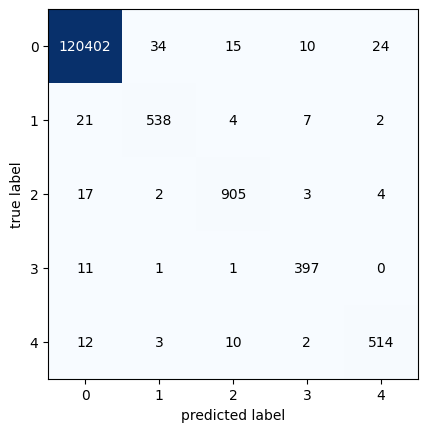

In [66]:
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_target=y_test['failure'],
                      y_predicted=y_test['pred'],
                      binary=False)

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

In [68]:
from sklearn.metrics import recall_score, precision_score, f1_score

# For multi-class, you need to specify average parameter
recall_micro = recall_score(y_test['failure'], y_test['pred'], average='micro')
recall_macro = recall_score(y_test['failure'], y_test['pred'], average='macro')
recall_weighted = recall_score(y_test['failure'], y_test['pred'], average='weighted')

precision_micro = precision_score(y_test['failure'], y_test['pred'], average='micro')
precision_macro = precision_score(y_test['failure'], y_test['pred'], average='macro')
precision_weighted = precision_score(y_test['failure'], y_test['pred'], average='weighted')

f1_micro = f1_score(y_test['failure'], y_test['pred'], average='micro')
f1_macro = f1_score(y_test['failure'], y_test['pred'], average='macro')
f1_weighted = f1_score(y_test['failure'], y_test['pred'], average='weighted')

print("Multi-Class Classification Results:")
print("\n--- Recall ---")
print(f"Micro: {recall_micro:.4f}")
print(f"Macro: {recall_macro:.4f}")
print(f"Weighted: {recall_weighted:.4f}")

print("\n--- Precision ---")
print(f"Micro: {precision_micro:.4f}")
print(f"Macro: {precision_macro:.4f}")
print(f"Weighted: {precision_weighted:.4f}")

print("\n--- F1 Score ---")
print(f"Micro: {f1_micro:.4f}")
print(f"Macro: {f1_macro:.4f}")
print(f"Weighted: {f1_weighted:.4f}")

Multi-Class Classification Results:

--- Recall ---
Micro: 0.9985
Macro: 0.9661
Weighted: 0.9985

--- Precision ---
Micro: 0.9985
Macro: 0.9581
Weighted: 0.9985

--- F1 Score ---
Micro: 0.9985
Macro: 0.9621
Weighted: 0.9985


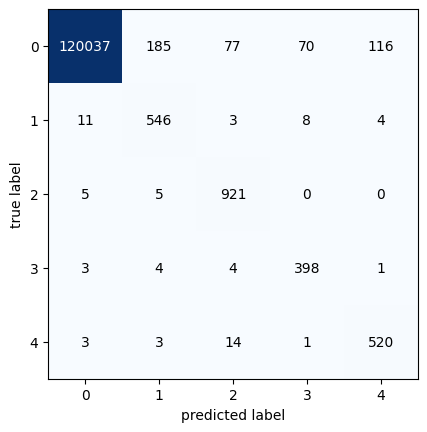

In [69]:
cm = confusion_matrix(y_target=y_test['failure'],
                      y_predicted=y_test['pred2'],
                      binary=False)

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

In [71]:
import joblib

# Save the main model
joblib.dump(model, 'predictive_maintenance_model.pkl')

# Also save the feature names
feature_names = X_train.columns.tolist()
joblib.dump(feature_names, 'feature_names.pkl')

print("Model and feature names saved!")

Model and feature names saved!


In [73]:
import joblib

# Save the main model
joblib.dump(cat_model, 'catboost_maintenance_model.pkl')

print("Model saved!")

Model saved!


<div style="color:white;
           display:fill;
           border-radius:10px;
           font-size:110%;
           font-family:cursive;
           letter-spacing:0.5px;
           background-color:#32a6a8;
           color:Black;
           font-family:cursive;
            padding:5px 5px 5px 5px;
           ">
<h1 style="text-align:center;font-weight: bold;">XGBoost binary</h1>



</div>

In [74]:
threshold_dates = [[pd.to_datetime('2015-01-31 01:00:00'), pd.to_datetime('2015-08-01 01:00:00')],
                   [pd.to_datetime('2015-08-31 01:00:00'), pd.to_datetime('2015-09-01 01:00:00')],
                   [pd.to_datetime('2015-09-30 01:00:00'), pd.to_datetime('2015-10-01 01:00:00')]]

last_train_date, first_test_date = threshold_dates[0]

y_train = labeled_features.loc[labeled_features['datetime'] < last_train_date, 'failure']
X_train = pd.get_dummies(labeled_features.loc[labeled_features['datetime'] < last_train_date].drop(['datetime',
                                                                                                    #'machineID',
                                                                                                    'failure'],axis= 1))

In [75]:
labeled_features

,machineID,datetime,voltmean_3h,temperaturemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,temperaturesd_3h,pressuresd_3h,vibrationsd_3h,...,error3count,error4count,error5count,comp1,comp2,comp3,comp4,model,age,failure
0,1,2015-01-04 06:00:00,186.092896,451.641253,107.989359,55.308074,13.489090,62.185045,5.118176,4.904365,...,0.0,0.0,0.0,22.000,217.000,157.000,172.000,model3,18,none
1,1,2015-01-04 09:00:00,166.281848,453.787824,106.187582,51.990080,24.276228,23.621315,11.176731,3.394073,...,0.0,0.0,1.0,22.125,217.125,157.125,172.125,model3,18,comp4
2,1,2015-01-04 12:00:00,175.412103,445.450581,100.887363,54.251534,34.918687,11.001625,10.580336,2.921501,...,0.0,0.0,1.0,22.250,217.250,157.250,172.250,model3,18,comp4
3,1,2015-01-04 15:00:00,157.347716,451.882075,101.289380,48.602686,24.617739,28.950883,9.966729,2.356486,...,0.0,0.0,1.0,22.375,217.375,157.375,172.375,model3,18,comp4
4,1,2015-01-04 18:00:00,176.450550,446.033068,84.521555,47.638836,8.071400,76.511343,2.636879,4.108621,...,0.0,0.0,1.0,22.500,217.500,157.500,172.500,model3,18,comp4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292776,100,2015-12-31 18:00:00,177.758754,458.391629,103.183160,46.846592,13.147011,75.100940,3.111700,3.576693,...,0.0,0.0,0.0,82.500,7.500,82.500,52.500,model4,5,none
292777,100,2015-12-31 21:00:00,166.078945,424.431184,98.344409,30.907459,29.351231,69.348245,16.940674,3.731256,...,0.0,0.0,0.0,82.625,7.625,82.625,52.625,model4,5,none
292778,100,2016-01-01 00:00:00,158.327984,504.056262,108.055441,40.109705,9.605817,78.036116,9.154932,3.379639,...,0.0,0.0,0.0,82.750,7.750,82.750,52.750,model4,5,none
292779,100,2016-01-01 03:00:00,170.306956,438.653616,102.346227,47.481232,8.457322,43.021553,0.785721,3.198928,...,0.0,0.0,0.0,82.875,7.875,82.875,52.875,model4,5,none


In [76]:
threshold_dates

[[Timestamp('2015-01-31 01:00:00'), Timestamp('2015-08-01 01:00:00')],
 [Timestamp('2015-08-31 01:00:00'), Timestamp('2015-09-01 01:00:00')],
 [Timestamp('2015-09-30 01:00:00'), Timestamp('2015-10-01 01:00:00')]]

In [77]:
last_train_date

Timestamp('2015-01-31 01:00:00')

In [78]:
first_test_date

Timestamp('2015-08-01 01:00:00')

In [79]:
y_train

,failure
0,none
1,comp4
2,comp4
3,comp4
4,comp4
...,...
290090,none
290091,none
290092,none
290093,none


In [80]:
X_train

,machineID,voltmean_3h,temperaturemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,temperaturesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,...,error5count,comp1,comp2,comp3,comp4,age,model_model1,model_model2,model_model3,model_model4
0,1,186.092896,451.641253,107.989359,55.308074,13.489090,62.185045,5.118176,4.904365,171.536044,...,0.0,22.000,217.000,157.000,172.000,18,False,False,True,False
1,1,166.281848,453.787824,106.187582,51.990080,24.276228,23.621315,11.176731,3.394073,171.069056,...,1.0,22.125,217.125,157.125,172.125,18,False,False,True,False
2,1,175.412103,445.450581,100.887363,54.251534,34.918687,11.001625,10.580336,2.921501,170.859615,...,1.0,22.250,217.250,157.250,172.250,18,False,False,True,False
3,1,157.347716,451.882075,101.289380,48.602686,24.617739,28.950883,9.966729,2.356486,171.566669,...,1.0,22.375,217.375,157.375,172.375,18,False,False,True,False
4,1,176.450550,446.033068,84.521555,47.638836,8.071400,76.511343,2.636879,4.108621,171.536866,...,1.0,22.500,217.500,157.500,172.500,18,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290090,100,164.054168,447.459325,107.057536,42.214683,2.967280,55.225189,11.408839,2.191353,169.525448,...,0.0,138.250,48.250,63.250,2.250,5,False,False,False,True
290091,100,151.231673,473.908468,92.709690,42.312254,10.774165,16.960052,7.718419,0.934053,167.770420,...,0.0,138.375,48.375,63.375,2.375,5,False,False,False,True
290092,100,166.955660,439.401670,101.715188,37.590707,10.545049,70.094479,4.653171,4.432187,167.121272,...,0.0,138.500,48.500,63.500,2.500,5,False,False,False,True
290093,100,167.789377,421.179958,105.181519,40.394049,23.345396,43.034566,16.018058,1.994122,167.503061,...,0.0,138.625,48.625,63.625,2.625,5,False,False,False,True


In [81]:
dict_map = {'none': 0,
            'comp1': 1,
            'comp2': 1,
            'comp3': 1,
            'comp4': 1,
           }

y_train = y_train.replace(dict_map)
y_train.value_counts()

/tmp/ipython-input-3515642115.py:8: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,count
failure,
0,23142
1,693


In [82]:
# Create an instance of the XGBClassifier
model = XGBClassifier(objective='binary:logistic')

# Fit the model to the training data
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [83]:
cat_model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    loss_function='Logloss',  # For binary classification
    random_seed=42,
    verbose=100,  # Shows progress every 100 iterations
    auto_class_weights='Balanced'  # Handles imbalance automatically!
)

# Training is the same
cat_model.fit(X_train, y_train)


0:	learn: 0.6046329	total: 5.61ms	remaining: 5.6s
100:	learn: 0.0235059	total: 479ms	remaining: 4.26s
200:	learn: 0.0096558	total: 916ms	remaining: 3.64s
300:	learn: 0.0096558	total: 1.27s	remaining: 2.95s
400:	learn: 0.0096558	total: 1.61s	remaining: 2.41s
500:	learn: 0.0096558	total: 1.96s	remaining: 1.95s
600:	learn: 0.0096558	total: 2.3s	remaining: 1.52s
700:	learn: 0.0096558	total: 2.67s	remaining: 1.14s
800:	learn: 0.0096558	total: 3.31s	remaining: 823ms
900:	learn: 0.0096558	total: 3.71s	remaining: 408ms
999:	learn: 0.0096022	total: 4.26s	remaining: 0us


In [84]:
y_test = labeled_features.loc[labeled_features['datetime'] >= first_test_date, 'failure']
X_test = pd.get_dummies(labeled_features.loc[labeled_features['datetime'] >= first_test_date].drop(['datetime',
                                                                                                    #'machineID',
                                                                                                    'failure'],axis= 1))

In [85]:
y_test = y_test.replace(dict_map)
y_test.value_counts()

/tmp/ipython-input-1381593820.py:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,count
failure,
0,120485
1,2454


In [86]:
y_test

,failure
1676,0
1677,0
1678,0
1679,0
1680,0
...,...
292776,0
292777,0
292778,0
292779,0


In [87]:
y_test = y_test.to_frame()
y_test['pred'] = list(model.predict(X_test))
y_test['pred'].value_counts()

,count
pred,
0,120801
1,2138


In [88]:
y_test['pred2'] = list(cat_model.predict(X_test))
y_test['pred2'].value_counts()

,count
pred2,
0,120306
1,2633


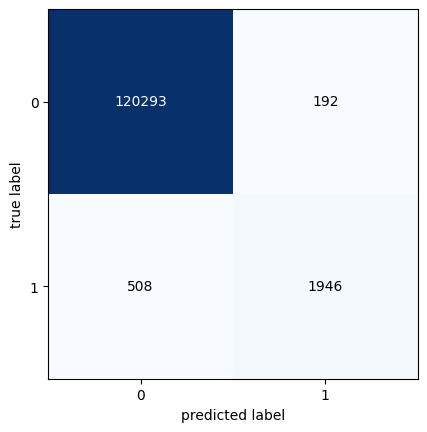

In [89]:
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_target=y_test['failure'],
                      y_predicted=y_test['pred'],
                      binary=True)

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

In [90]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

recall = recall_score(y_test['failure'], y_test['pred'])

print("Recall: ", recall)

precision = precision_score(y_test['failure'], y_test['pred'])

print("Precision: ", precision)

Recall:  0.7929910350448248
Precision:  0.9101964452759589


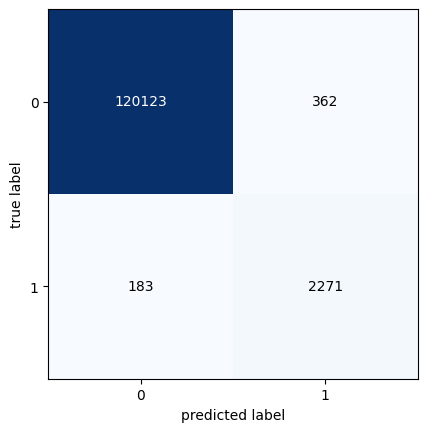

In [91]:
cm = confusion_matrix(y_target=y_test['failure'],
                      y_predicted=y_test['pred2'],
                      binary=False)

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

In [92]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

recall = recall_score(y_test['failure'], y_test['pred2'])

print("Recall: ", recall)

precision = precision_score(y_test['failure'], y_test['pred2'])

print("Precision: ", precision)

Recall:  0.9254278728606357
Precision:  0.8625142423091531


In [93]:
import joblib

# Save the main model
joblib.dump(model, 'predictive_maintenance_model_binary.pkl')

# Also save the feature names
feature_names = X_train.columns.tolist()
joblib.dump(feature_names, 'feature_names.pkl')

print("Model and feature names saved!")

Model and feature names saved!


In [94]:
import joblib

# Save the main model
joblib.dump(cat_model, 'catboost_maintenance_model_binary.pkl')

print("Model saved!")

Model saved!
